## supervised learning

- classification
    - binary classification
    - multiclass classification

### 이진 분류
positive class 와 negative class가 있음.
positive class는 분류하고자 하는 대상이다.

### 회귀
연속적인 숫자, 또는 프로그래밍 용어로 말하면 floating point 를 예측하는 것이다.

출력 값에 연속성이 있는지 찾아보면 회귀와 분류 문제를 쉽게 구분할 수 있다.

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib notebook
%matplotlib inline

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'scatter of forge datasets')

Text(0.5, 0, '1st feature')

Text(0, 0.5, '2nd feature')

X.shape:  (26, 2)


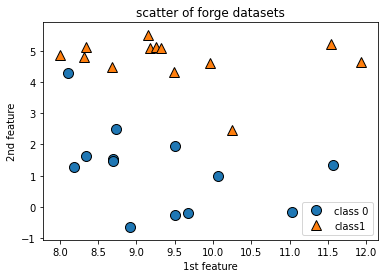

In [2]:
# make datasets
X, y = mglearn.datasets.make_forge()

# plotting scatter
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.title("scatter of forge datasets")
plt.legend(["class 0", "class1"], loc = 4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape: ", X.shape)

위의 dataset의 shape은 26, 2 이다.

회귀 알고리즘에는 인위적으로 만든 wave datasets을 사용한다.

wave datasets 은 input feature 1개와 모델링할 target 변수 (또는 응답)을 가진다.

(-3.0, 3.0)

Text(0.5, 0, 'features')

Text(0, 0.5, 'targets')

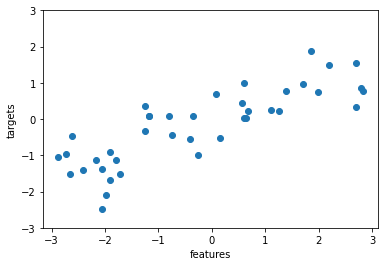

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("features")
plt.ylabel("targets")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
# sklearn에 있는 dataset은 bunch 객체이다.
# 딕셔너리와 비슷하지만 bunch['key'] 대신 bunch.key 를 사용할 수 있다.

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer.data.shape)

(569, 30)


In [6]:
print("# of samples for class\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

# of samples for class
 {'malignant': 212, 'benign': 357}


In [7]:
print("name of features\n", cancer.feature_names)

name of features
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### boston housing price prediction

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


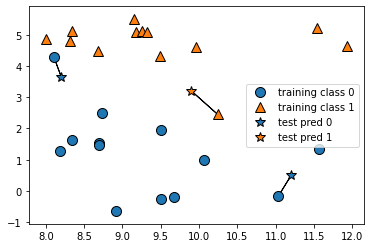

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [15]:
print("performance:", clf.score(X_test, y_test))

performance: 0.8571428571428571


Text(0.5, 1.0, 'neighbors: 1')

Text(0.5, 0, 'feature 1')

Text(0, 0.5, 'feature 2')

Text(0.5, 1.0, 'neighbors: 3')

Text(0.5, 0, 'feature 1')

Text(0, 0.5, 'feature 2')

Text(0.5, 1.0, 'neighbors: 9')

Text(0.5, 0, 'feature 1')

Text(0, 0.5, 'feature 2')

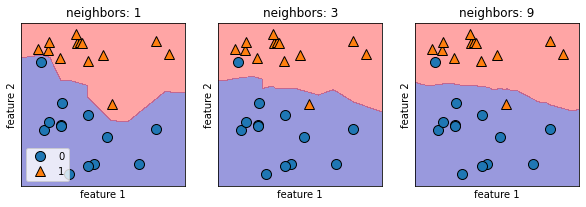

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("neighbors: {}".format(n_neighbors))
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")
axes[0].legend(loc=3)                        

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [18]:
train_accuracy = []
test_accuracy = []
# apply n_neighbors 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # create model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # store acc of train set
    train_accuracy.append(clf.score(X_train, y_train))
    # store acc of test set
    test_accuracy.append(clf.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

Text(0, 0.5, 'acc')

Text(0.5, 0, 'n_neighbors')

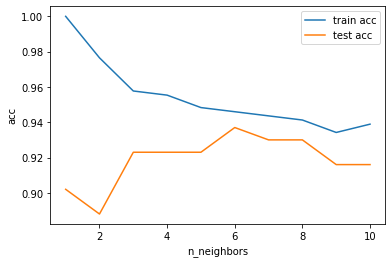

In [19]:
plt.plot(neighbors_settings, train_accuracy, label="train acc")
plt.plot(neighbors_settings, test_accuracy, label="test acc")
plt.ylabel("acc")
plt.xlabel("n_neighbors")
plt.legend()

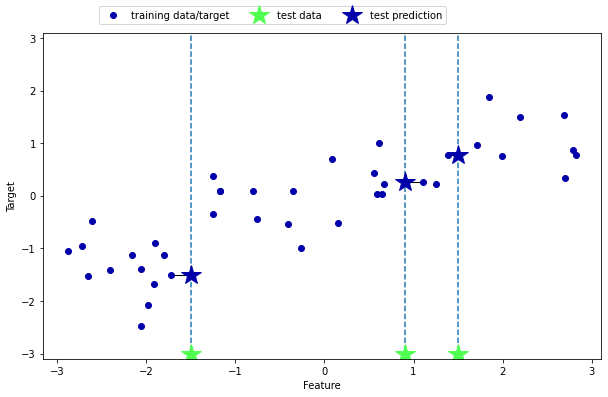

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

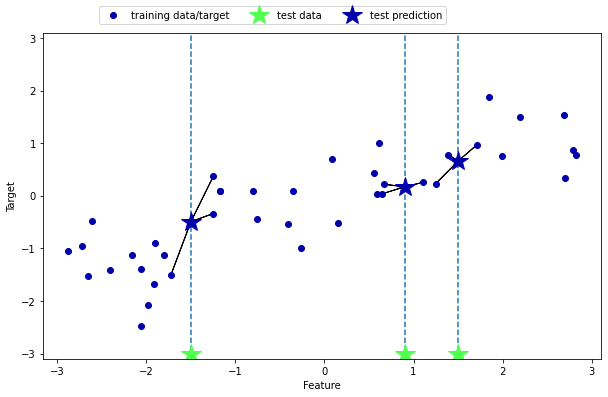

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)

In [25]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
print(reg.predict(X_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [27]:
print(reg.score(X_test, y_test))

0.8344172446249605


KNeighborsRegressor(n_neighbors=1)

Text(0.5, 1.0, '1 neighbors train score: 1.00 test score: 0.35')

Text(0.5, 0, 'feature')

Text(0, 0.5, 'target')

KNeighborsRegressor(n_neighbors=3)

Text(0.5, 1.0, '3 neighbors train score: 0.82 test score: 0.83')

Text(0.5, 0, 'feature')

Text(0, 0.5, 'target')

KNeighborsRegressor(n_neighbors=9)

Text(0.5, 1.0, '9 neighbors train score: 0.73 test score: 0.65')

Text(0.5, 0, 'feature')

Text(0, 0.5, 'target')

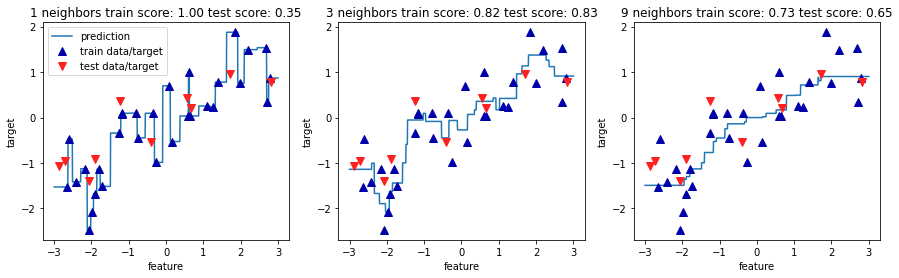

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # predict with 1, 3, 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbors train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["prediction", "train data/target",
               "test data/target"], loc="best")

일반적으로 KN classifier 에 중요한 parameters 는 2개이다.
- 데이터 포인트 사이의 거리를 재는 방법
- 이웃의 수

실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만, 이 매개변수는 잘 조정해야 한다.

거리 재는 방법은 보통 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용한다.

### linear model
input features 에 따른 선형 함수를 만들어 예측을 수행한다.

w[0]: 0.393906  b: -0.031804


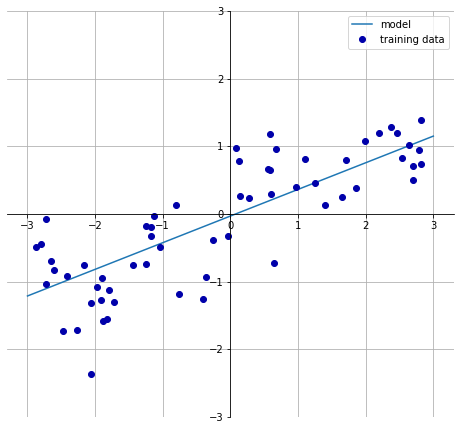

In [29]:
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원(features 가 더 많음) 에서는 초평면 hyperplane이 되는 회귀 모델의 특징을 가지고 있다.

선형 회귀linear regression 또는 최소제곱법Ordinary Least Squares은 가장 간단하고 오래된 회귀용 선형 알고리즘이다. 선형 회귀는 예측과 훈련 세트에 있는 target y 사이의 평균제곱오차 mean squared error를 최소화하는 파라미터 w 와 b를 찾는다.

MSE는 pred와 target 값의 차이의 제곱해 더한 후 샘플의 개수로 나눈 것이다.

(pred^2 + target^2) / N

선형 회귀는 매개변수가 없는 것이 장점이다. 하지만 모델의 복잡도를 제어할 방법이 없는 것이 단점이다.

In [30]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

기울기 파라미터 w 는 가중치weight 또는 계수coefficient 라고 하며 lr 객체의 coef_ 속성에 저장되어 있다.

편향 offset 또는 절편intercept 파라미터 b 는 intercept_ 속성에 저장되어 있다.

In [31]:
print(lr.coef_)

[0.39390555]


In [32]:
print(lr.intercept_)

-0.031804343026759746


In [33]:
print(lr.score(X_train, y_train))

0.6700890315075756


In [34]:
print(lr.score(X_test, y_test))

0.65933685968637


위는 훈련할 features 가 적어서 underfitting 이 일어났다.

아래는 보스턴 주택가격 데이터셋같은 복잡한 데이터셋에서 어떻게 동작하는지 보여준다.

In [35]:
X, y = mglearn.datasets.load_extended_boston()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [37]:
print(lr.score(X_train, y_train))

0.9520519609032729


In [38]:
print(lr.score(X_test, y_test))

0.607472195966596


모델이 overfitting 되었다.

따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.

기본 선형 회구 방식 대신 가장 널리 쓰이는 모델은 리지 회귀이다.

### 리지 회귀
리지Ridge 도 회귀를 위한 선형 모델이기에 최소적합법에서 사용한 것과 가은 예측 함수를 사용한다. 하지만 리지 회귀에서의 가중치 w 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다. 

가중치의 절댓값을 가능한 작게 만드는 것이다. 다시 말해 w의 모든 원소가 0에 가깝게 되길 원한다.

직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다(기울기를 작게 만든다).

이런 제약을 규제regularization 라고 한다. regularization은 overfitting 되지 않도록 모델을 강제로 제한하는 것이다. 

ridge regression에 사용하는 regularization 방식을 L2 regularization 이라고 한다.

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge().fit(X_train, y_train)

In [41]:
print(ridge.score(X_train, y_train))

0.885796658517094


In [42]:
print(ridge.score(X_test, y_test))

0.7527683481744754


ridge 는 모델을 단순하게(계수를 0에 가깝게) 해주고 train set 에 대한 성능 사이를 절충하는 법을 제공한다.

사용자는 alpha 매개변수로 훈련 셋의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다.

위에선 default 값인 alpha=1 을 사용했다.

최적의 alpha 값은 사용하는 데이터셋마다 다르므로 잘 찾아야 한다.

alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 셋의 성능은 나빠지지만 일반화에 도움을 줄 수 있다.

In [43]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369615
0.6359411489177311


In [44]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.928227368500199
0.772206793647979


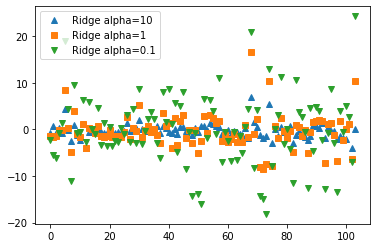

In [45]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.legend()

alpha 값이 커질수록 일반화가 잘 되었고, alpha 값이 작아질 수록 일반화가 잘 되지 않는다. 일반선형회귀는 alpha 값이 0이다.

아래는 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프, 학습곡선 learning curve이다.

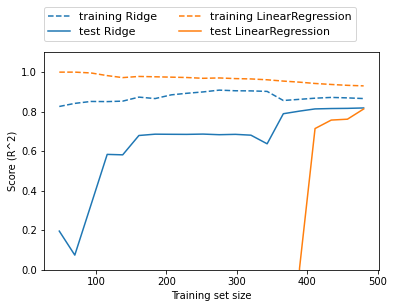

In [46]:
mglearn.plots.plot_ridge_n_samples()

In [47]:
# learning curve of ridge and linear for boston housing price datasets

In [48]:
# important thing
# if there is many datas, no more efficiency from regularizations

### 라소 Lasso
ridge 회귀에서와 같이 lasso 도 계수를 0에 가깝게 만드려고 한다. 하지만 방식이 조금 다르다. 이를 L1 regularization 이라 한다. 

L1 규제의 결과로 lasso 를 사용할 때 어떤 계수는 정말 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생긴다는 것이다. 어찌보면 특성 선택 feature selection이 자동으로 이워진다고 볼 수 있다. 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.

아래는 확장된 보스턴 주택가격 데이터셋에 라소를 적용한 것이다.

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("train set acc")
print(lasso.score(X_train,y_train))

train set acc
0.2932376899111462


In [50]:
print("test set acc")
print(lasso.score(X_test, y_test))

test set acc
0.20937503255272294


In [51]:
print("used features are")
print(np.sum(lasso.coef_ != 0))

used features are
4


lasso는 train set test set 모두 결과가 좋지 않다. 이는 underfitting 이다.
104개의 특성 중 4개만 사용한 것을 볼 수 있다.

ridge와 마찬가지로 lasso도 계수를 얼마나 강하게 0으로 보낼지 조절하는 alpha 매개변수를 지원한다.

underfitting 을 줄이기 위해 alpha 값을 줄여보겠다. 이렇게 한다면 max_iter(반복 실행 최대 횟수)의 기본값을 늘려야 한다.

In [52]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))

0.89622265110865


In [53]:
print(lasso001.score(X_test, y_test))

0.7656571174549985


In [54]:
print(np.sum(lasso001.coef_ != 0))

33


alpha 값을 낮추면 모델의 복잡도가 증가해 성능이 증가하낟.

ridge 보다 성능은 잘 나왔으며, 특성이 33개 뿐이라 모델을 분석하기 쉽다.

alpha 값을 너무 낮추면 regularization 효과가 없어져 overfitting 되므로 linear regression 결과와 비슷해진다.

In [55]:
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))

0.9515087977585444


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.581397169873526, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


In [56]:
print(lasso00001.score(X_test, y_test))

0.6193582257352754


In [57]:
print(np.sum(lasso00001.coef_ != 0))

103


plotting coefficient for each lasso models


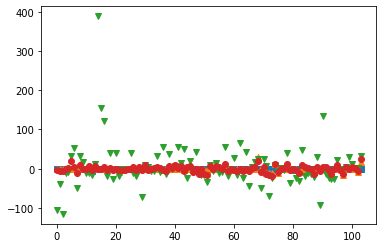

In [58]:
print("plotting coefficient for each lasso models")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.00001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

alpha=0.1 Ridge model은 alpha=0.01 Lasso model 과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다.

실제로 이 두 모델 중 Ridge model을 더 선호한다.

하지만 특성이 많고 그 중 이부분만 중요하다면 Lasso 가 더 좋은 선택일 수 있다.

sklearn은 L1, L2 를 결합한 ElasticNet 도 제공한다. 

### 분류용 선형 모델
#### 이진 분류 binary classification
회귀용 선형 모델에서는 출력 y^이 특성의 선형 함수였다. 즉 직선, 평면, 초평면이다.
분류용 선형 모델에서 입력의 선형 함수는 결정 경계를 나타낸다.

다른 말로하면 이진 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기이다.

선형 모델을 학습시키는 알고리즘을 다양하다. 아래는 분류 기준이다.
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지


가장 널리 알려진 두 개의 선형 분유 알고리즘은 linear_model.LogisticRegression에 구현된 logistic regression과 svm.LinearSVC (Support Vector Classifier) 에 구현된 suport vector machine 이다. 

LogisticRegression은 이름에 Regression이 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘이므로 LinearRegression과 혼동하면 안 된다.

아래는 forge datasets을 이용한 LogisticRegression과 LinearSVC 모델이다.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'LinearSVC')

Text(0.5, 1.0, 'LogisticRegression')

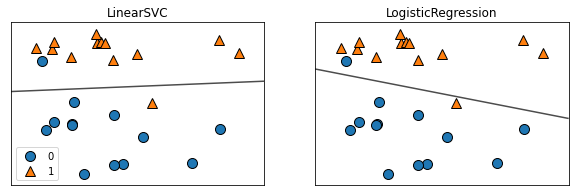

In [60]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
axes[0].legend()

LogisticRegession과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다. C의 값이 높아지면 규제가 감소한다.

높은 C 값을 설정하면 이들은 훈련 셋에 가능한 최대로 맞추려 하고, 반면에 C 값을 낮추면 모델은 계수 벡터 w 가 0에 가까워지도록 만든다.

C의 작동 방식을 다르게 설명할 수도 있다.

C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것이다.

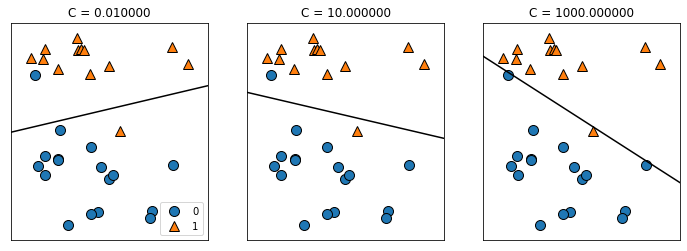

In [61]:
mglearn.plots.plot_linear_svc_regularization()

오른쪽 모델은 overfitting 되었다.

유방암 데이터셋을 사용해서 LogisticRegression을 좀더 자세히 보겠다.

In [62]:
from sklearn.datasets import load_breast_cancer

In [63]:
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# C=1 default
logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)
print("train set")
print(logreg.score(X_train,y_train))
print("test set")
print(logreg.score(X_test, y_test))

train set
0.9577464788732394
test set
0.958041958041958


In [64]:
logreg100  = LogisticRegression(C=100, max_iter=5000).fit(X_train,y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9835680751173709
0.965034965034965


C=100을 사용하니 전체적인 정확도가 높아졌다. 이는 복잡도가 높은 모델일수록 서능이 좋음을 말해준다.

아래는 C=0.01을 사용한 결과이다.

In [65]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train,y_train)
print("train set")
print(logreg001.score(X_train, y_train))
print("test set")
print(logreg001.score(X_test, y_test))

train set
0.9530516431924883
test set
0.951048951048951


이미 underfitting 된 모델에서 더 규제를 가했으므로정확도가 더욱 감소한다.

([<matplotlib.axis.XTick at 0x848cb8>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'worst 

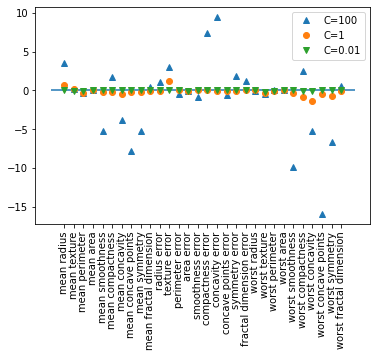

In [66]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.legend()

이해하기 쉬운 모델을 원한다면 비록 모델이 몇 개의 특성만 사용하게 되겠지만 L1 규제를 사용하는 것이 좋다.

train
0.001 0.9131455399061033
test
0.001 0.9230769230769231


train
1 0.960093896713615
test
1 0.958041958041958


train
100 0.9859154929577465
test
100 0.9790209790209791


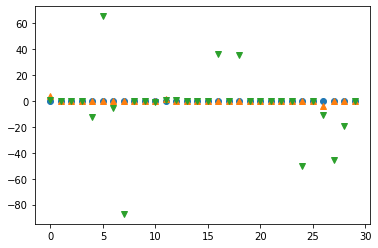

In [67]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train,y_train)
    print("train")
    print(C, lr_l1.score(X_train,y_train))
    print("test")
    print(C, lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label=str(C))

이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많다.



로지스틱 회귀를 제외하고 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원한다. 즉 다중 클래스multiclass 를 지원하지 않는다.

이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다one-vs.-rest 방법이다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다. 예측할 때는 이렇게 만들어진 모든 이진 분류기가 작동해 가장 노은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.

다중 클래스 로지스틱 회귀 이면의 수학은 일대다 방식과 다르다. 하지만 여기서도 클래스마다 하나의 계수 벡터와 절편을 만들고, 예측 방법도 같다.

세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해 볼 ㄳ이다.

이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포(Gaussian distribution)을 따른다.

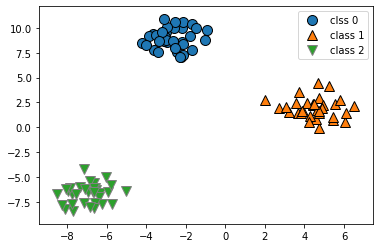

In [68]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["clss 0", "class 1", "class 2"])

In [69]:
# we will train LinearSVC clssifier by this datasets

In [70]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


coef_ 배열 크기는 (3,2). coef_ 의 rows는 세 개의 클래스에 각각 대응하는 coef vector를 담고 있으며, cols은 각 특성에 따른 intercept 값(이 데이터셋은 두 개)을 가지고 있다.

intercept_는 각 클래스의 절편은 담은 1차원 벡터이다.

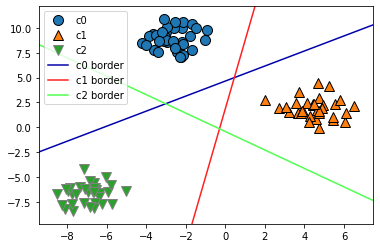

In [71]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.legend(['c0', 'c1', 'c2', 'c0 border', 'c1 border', 'c2 border'])

각각의 클래스에 따른 경계가 만들어졌다.

각 클래스에 따라 0보다 크면 true 0보다 작으면 false를 가지며 분류될 것이다.

#### 중앙의 삼각형 영역은 어떨까? 
세 분류기 모두 나머지로 분류한 이 곳의 데이터 포인트는 분류 공식의 결과가 가장 높은 클래스로 분류된다. 즉 가장 가까운 직선의 클래스가 된다.

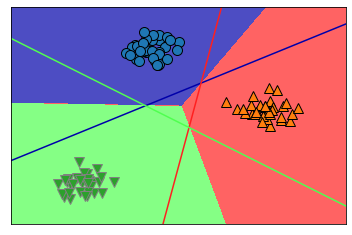

In [72]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1], c=color)

세 개의 일대다 분류기가 만든 다중 클래스 결정 경계이다.

선형 모델의 주요 매개변수는 회귀 모델에서는 alpha 였고 LinearSVC와 LogisticReression에서는 C 이다. alpha값이 클수록, C 값이 작을수록 모델이 단순해진다. 

특별히 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중료하다. 보통 C와 alpha는 로그 스케일로 최적치를 정한다.

그리고 L1 규제를 사용할지 L2 규제를 사용할지를 정해야 한다.

중요한 특성이 많지 않다고 생각하면 l1, 그렇지 않으면 기본적으로 l2 규제를 사용해야 한다.


선형 모델은 학습 속도가 빠르고 예측도 빠르다. 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동한다.

대용량이라면 기본설정보다 빨리 처리하도록 LogisticRegression 과 Ridge에 solver='sag' 옵션을 준다. 다른 대안으로는 선형모델의 대용량 처리 버전으로 구현된 SGDClassifier와 SGDRegressor를 사용한다.

선형 모델의 또 하나 장점은 앞서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다. 하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종있다. 특히 특성들이 서로 깊게 연관되어 있다며 더욱 그렇다. 이럴 땐 계수를 분석하기도 매우 어려울 수 있다.



### 나이브 베이즈 분류기 naive bayes classifier
naive bayes 분류기는 선형 모델과 매우 유사하다. logistic regression이나 linear SVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 약하다.

나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문이다.

sklearn에 구현된 나이브 베이즈 분류기는 세 가지이다.
- GaussianNB
- BernoulliNB
- MultinomialNB

가우시안은 연속적인 어떤 데이터에도 적용할 수 있고 베르누이는 이진 데이터를, 멀티노미얼은 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 횟수)에 적용된다. 베르누이, 멀티노미얼은 대부분 텍스트 데이터를 분류할 때 사용한다.

베르누이 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개 인지 센다.

In [73]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

In [74]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("feature counts")
print(counts)

feature counts
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [75]:
print(np.unique(y))

[0 1]


멀티노미얼과 가우시안은 계산하는 통계 데이터의 종류가 조금 다르다. 
- 멀티노미얼
    - 클래스별로 특성의 평균을 계산한다
- 가우시안
    - 클래스별로 각 특성의 표준편차와 평균을 저장한다

예측할 땐 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 한다.

멀티노미얼과 베르누이의 예측 공식은 선형 모델과 형태가 같다. 그러나 나이브 베이즈 모델의 coef_ 는 기울기 w가 아니라서 선형 모델과는 의미가 다르다.

#### 장단점과 매개변수
멀티노미얼과 베르누이는 alpha 매개변수 하나를 가지고 있다. alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가한다. 이는 통계 데이터를 완만하게 만들어준다. 

alpha가 크면 더 완만해지고 모델의 복잡도가 낮아진다. alpha는 성능 향상에 크게 기여하지 않지만 이 값을 조정하면 어느 정도는 정확도를 높일 수 있다.

가우시안은 대부분 매우 고차원인 데이터셋에 사용하고, 베르누이와 멀티노미얼은 텍스트 같은 희소한 데이터를 카운트하는 데 사용한다.

멀티노미얼은 보통 0이 아닌 특성이 비교적 많은 데이터셋 (e.g. 큰 문서) 에서 베르누이보다 성능이 높다.

나이브 베이즈 모델과 선형 모델은 장단점은 비슷하다. 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽다.

희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않다.

선형 모델로 학습 시간이 너무 오래 걸리는 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하며 종종 사용된다.

### 결정 트리 decision tree
분류와 회귀 문제에 널리 사용된다. 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습한다.

일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 오버피팅된다. 

오버피팅을 막는 전략은 크게 두 가지이다.

- 사전 가지치기(pre-pruning)
    - 트리 생성을 일찍 중단하는 전략
        - 트리의 최대 깊이 제한
        - 리프의 최대 개수 제한
        - 노드가 분할하기 위한 포인트의 최소 개수 지정
- 사후 가지치지 또는 가지치기(post-pruning or pruning)
    - 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략

sklearn 에서 decision tree는 아래의 항목에 구현되어 있으며, sklearn은 사전 가지치기pre-pruning만 지원한다.

- DecisionTreeRegressor
- DecisionTreeClassifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [78]:
print("train")
print(tree.score(X_train, y_train))
print("test")
print(tree.score(X_test, y_test))

train
1.0
test
0.9370629370629371


모든 리프 노드가 순수 노드이므로 훈련 셋의 정확도는 100이다.


즉 트리가 트레이닝 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌다. 

그리고 테스트 셋에 대한 퍼포먼스를 보면 오버피팅 된 것을 볼 수 있다.

이제 사전 가지치기pre-pruning 를 적용해서 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막으려 한다.

한 가지 방법은 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것이다.

max_depth=4 옵션을 통해 제한해보겠다

In [79]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [80]:
print("train")
print(tree.score(X_train,y_train))
print("test")
print(tree.score(X_test, y_test))

train
0.9882629107981221
test
0.951048951048951


#### 결정 트리 분석 decision tree analysis


In [81]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [82]:
# graphviz 는 에러가 겁나 뜬다.
# 안 쓰는 게 나을 거 같다

### 트리의 특성 중요도
전체 트리를 살펴보는 것은 어렵다. 따라서 트리가 어떻게 작동하는지 요약하는 속성들을 사용할 수 있다. 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도feature importance 이다.

특성 중요도는 0과 1 사이으이 숫자로, 각 특성에 대해 0 은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻이다. 특성 중요도의 전체 합은 1이다.


In [83]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


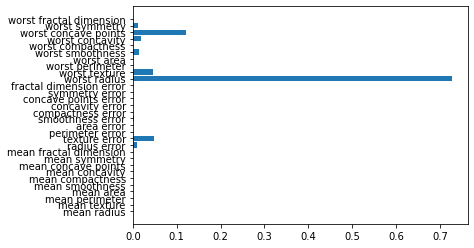

In [84]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)

plot_feature_importances_cancer(tree)

첫번째 노드에서 사용한 특성인 worst radius 가 가장 중요한 특성으로 나타난다. 이 그래프는 첫 번째 노드에서 두 클래스를 괘 잘나누고 있다는 우리의 관찰을 뒷받침해준다.

하지만 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 듯은 아니다. 단지 트리가 그 특성을 선택하지 않았을 분이며 다른 특성이 동일한 정보를 지니고 있어서 일 수도 있다.

선형 모델의 계수와는 달리, 특성 중요도는 항상 양수다. 특성이 어떤 클래스를 지지하는지는 알 수 없다. 

현재 특성 중요도의 값은 worst radius 가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없다.

Feature importances: [0. 1.]


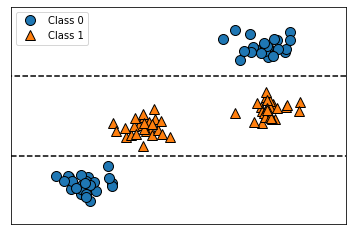

In [85]:
tree = mglearn.plots.plot_tree_not_monotone()

graphviz는 정말 쓰고 싶지 않다.

### 장단점과 매개변수
결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수이다. 보통은 사전 가지치기 방법 중 max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분하다.

결정 트리가 이전에 소개한 다른 알고리즘들보다 나은 점은 두 가지이다.
- 만들어진 모델을 쉽게 시각화할 수 있어 비전문가도 이해하기 쉽다.
- 데이터의 스케일에 구애받지 않는다. 

각 특성이 개별적으로 처리되어 데이터 크기에 영향을 받지 않아 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다. 특히 특성의 스키가 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동한다.

결정 트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다는 것이다.

### 결정 트리의 앙상블
앙상블ensemble 은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다. 

- 랜덤 포레스트random forest
- 그레디언트 부스팅gradient boosting

이 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용한다.

### 랜덤 포레스트 random forest
결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있다.

랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다. 랜덤 포레스트는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초한다. 예로, 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.

이런 전략을 구현하려면 결정 트리를 많이 만들어야 한다. 랜덤 포레스트는 이름에서 알 수 있듯이 트리들이 달라지도록 트리 생성 시 무작위성을 주입한다. 

트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법과 분할 테스트에서 특성을 무작위로 선택하는 방법을 살펴보겠다.

### 랜덤 포레스트 구축
랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 한다. (RandomForestRegressor 나 RandomForestClassifier의 n_estimators 매개변수).

여기에서는 트리가 10개 필요하다고 가정한다. 이 트리들은 오나전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 한다. 트리를 만들기 위해 먼데이터의 부트스트랩 샘플bootstrap sample 을 생성한다. 

다시 말해 n_samples 개의 데이터 포인트 주에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출한다. 이 데이터셋은 원래 데이터셋 크기와 같지만, 어떤 데이터 포인트는 누락될 수도 있고, 어떤 데이터 포인트는 중복되어 들어 있을 수 있다.

그다음 이렇게 만든 데이터셋으로 결정 트리를 만든다. 

이는 조금 다른 결정 트리 알고리즘을 가진다. 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다. 

부트스트랩 샘플링은 랜덤 포레스트의 트리가 조금식 다른 데이터셋을 이용해 만들어지도록 한다. 또 각 노드에서 특성의 일부만 사용하기 때문에 트리의 각 분기는 각기 다른 특성 부분 집합을 사용한다. 이 두 메커니즘이 합쳐져서 랜덤 포레스트의 모든 트리가 서로 달라지도록 만든다.

이 방식에서 핵심 매개변수는 max_features이다. max_features를 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다. (부트스트랩 샘플링으로 인한 무작위성은 그대로다.) max_features=1로 설정하면 투리의 분기는 테스트할 특성을 고를 필요거ㅏ 없게 되며 그냥 무작위로 건택한 특성의 임계값을 찾기만 하면 된다. 

결국 max_features 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것이다. max_featuers 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것이다. max_features 를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊어지게 된다.

랜덤 포레스트로 예측을 할 때는 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만든다. 회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만든다. 분류의 경우는 약한 투표 전략을 사용한다. 즉 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간점적인 예측을 한다. 트리들이 예측한 확률을 평균애ㅓ 가장 높은 확률을 가진 클래스가 예측값이 된다.

### 랜덤 포레스트 분석
앞서 사용한 two_moon 데이터셋을 가지고 트리 4개로 구성된 랜덤 포레스트 모델을 만들어보겠다.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [88]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

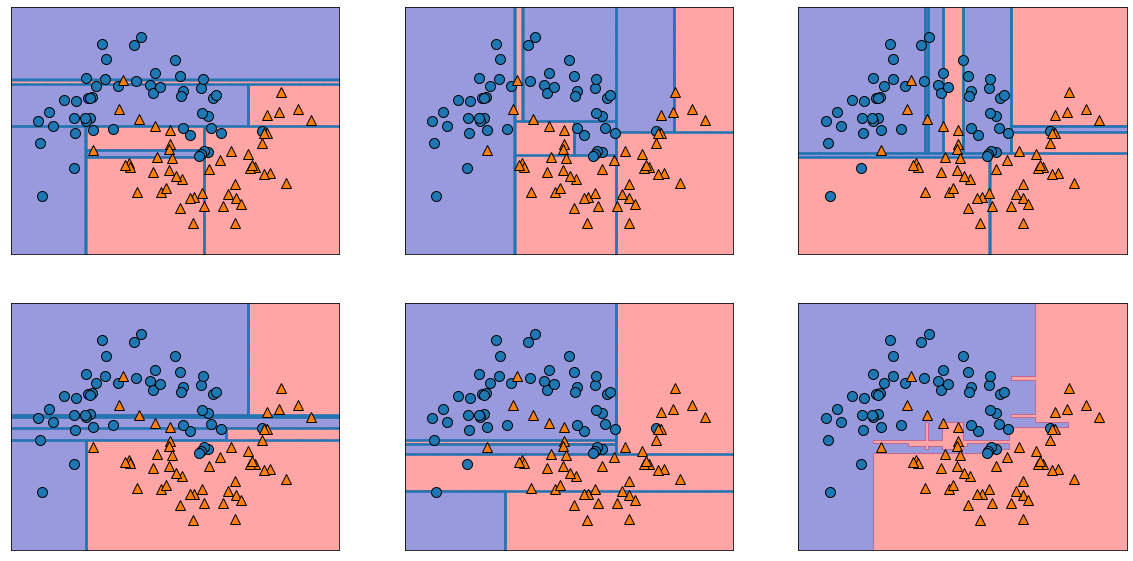

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

다섯 개의 트리가 만든 결정 경계 decision boundary 는 확연하게 다르다. 부트스트랩 샘플링 대문에 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전하다. 

랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어준다. 실제는 훨씬 많은 수백에서 수천 개의 트리를 사용하기 때문에 더 부드러운 결정경계가 만들어진다.

다른 예로 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용해보겠다

In [90]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [91]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [92]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


랜덤 포레스트로 아무런 매개변수 튜닝 없이 선형 모델이나 단열 결정 트리보다 높은 97% acc 를 냈다.

단인 결정 트리에서 한 것처럼 max_features 매개변수를 조정하거나 사전 가지치기를 할 수도 있다. 하지만 랜덤 포레스트는 기본 설정으로돌 좋은 결과를 만들어줄 때가 많다.

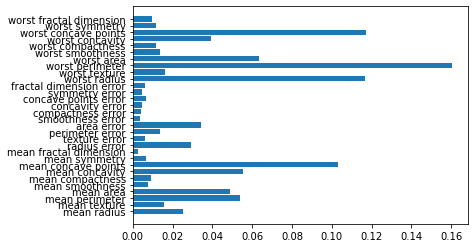

In [93]:
plot_feature_importances_cancer(forest)

### 장단점과 매개변수
회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다. 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도잘 작동하며 데이터의 스케일을 맞출 필요도 없다.

기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있다. 만약 의사 결정 과정을 간소하게 표현해야 한다면 단일 트리를 사용할 수 있다. 수십, 수백 개의 트리를 자세히 분석하기 어렵고 랜덤 포레스트의 트리는 (특성의 일부만 사용하므로) 결정 트리보다 더 깊어지는 경향도 있기 때문이다. 그러므로 비전문가에게 예측 과정을시각적으로 보여주기 위해서는 하나의 결정 트리가 더 좋은 선택이다. 

대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 잇지만 cpu 코어가 많다면 손쉽게 병렬처리할 수 있다. n_jobs 매개 변수를 이용해 사용할 코어 수를 지정할 수 있으며, n_jobs=-1 로 설정하면 컴퓨터의 모든 코어를 사용한다.

랜덤 포레스트는 랜덤하기 때문에 다른 random_state 를 지정하거나 random_state 자체를 지정하지 않으면 전혀 다른 모델이 만들어진다. 그리고 랜덤 포레스트의 트리가 많을수록 random_state 값의 변화에 따른 변동이 적다. 만약 같은 결과를 만들어야 한다면 random_state 값을 고정해야 한다.

랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터에는 선형 모델이 더 적합하다. 

랜덤 포레스트는 매우 큰 데이터셋에도 잘 작동하며 훈련은 여러 cpu코어로 간단하게 병렬화할 수 있다. 하지만 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느리다. 

중요 매개변수는 n_estimators, max_featuers이고 max_depth 같은 사전 가지치기 pre-puning 옵션이 있다. n_estimators 는 클수록 좋다. 더 많은 트리를 평균하면 오버피팅을 줄여 더 안정적인 모델을 만든다. 

max_features는 각 트리가 얼마나 무작위가 될지를 결정하며 작은 max_features는 오버피팅을 줄여준다. 일반적으로 기본값을 쓰는 것이 좋은 방법이다.

분류는 max_features=aqrt(n_features) 이고 회귀는 max_featuers=n_features 이다.

max_features나 max_leaf_nodes 매개변수를 추가하면 가끔 성능이 향상되기도 하며, 훈련과 예측에 필요한 메모리와 시간을 많이 줄일 수도 있다.

### 그레디언트 부스팅 회귀 트리 gradient boosting regression tree
여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법이다. 이름은 회귀지만 회귀와 분류 모두에 사용할 수 있다. 

랜덤 포레스트와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다. 기본적으로 그레디언트 부스팅 회귀 트리에는 무작위성이 없다. 대신 강력한 사전 가지치기가 사용된다. 그레디언트 부스팅 트리는 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다. 이런 얕은 트리 같은 간단한 모델(약한 학습기 weak learner) 을 많이 연결하는 것이 아이디어다. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어 트리가 많이 추가될수록 성능이 좋아진다.

앙상블 방식에 있는 사전 가지치기나 트리 개수 외에도 그레디언트 ㅅ부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate 이다. 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다. n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아진다.

아래는 기본값인 깊이가 3인 트리 100개와 학습률 0.1 을 사용한 것이다.

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [95]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [96]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))
# overfitting. refularization => max depth, pre-pruning

1.0
0.965034965034965


In [97]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [98]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9906103286384976
0.972027972027972


In [99]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [100]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9882629107981221
0.965034965034965


max_depth 감소와 learning_rate 감소의 두 방식은 모델의 복잡도를 감소시킨다.

GradientBoostingClassifier(max_depth=1, random_state=0)

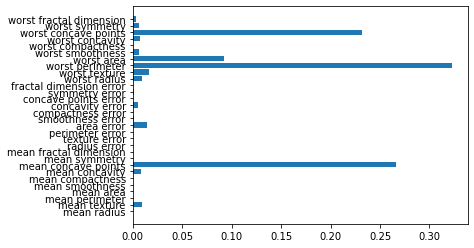

In [101]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

그레디언트 부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트와 비슷한 특성을 강조하다 있다. 하지만 일부 특성을 완전히 무시하고 있다.

비슷한 종류의 데이터에서 그레디언트 부스팅과 랜덤 포ㅔ스트 둘 다 잘 작동하지만 보통 더 안정적인 랜덤 포레스트를 먼저 적용한다. 랜덤 포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능가지 쥐어짜야 할 때 그레디언트 부스팅을 사용하면 도움이 된다.

### 장단점과 매개변수
그레디언트 부스팅 결정 트리는 지도학습에서 가장 강력하고 널리 사용하는 모델 중 하나이다. 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것이다. 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 동작한다. 그리고 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않는다.

트리의 개수를 지정하는 n_estiators 와 이전 트리의 오차를 보정하는 정도를 조절하는 learning_rate 이다. 이 두 매개변수는 매우 깊게 연관되며 learning_rate을 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 ㅁ낳은 트리를 추가해야 한다. n_estimators가 클수록 좋은 랜덤 포레스트와는 달리 그레디언트 부스팅에서 n_estimators를 크게하면 모델이 복잡해지고 오버피팅될 가능성이 높아진다. 일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimaotrs르 맞추고 나서 적절한 learninga_rate 을 찾는 것이다. 

GradientBoostingClassifier와 GradientBoostingRegressor 에 조기 종료를 위한 매개변수 n_iter_no_change와 validation_fraction이 추가되었다. 

중요한 또 다른 매개변수는 각 트리의 복잡도를 낮추는 max_depth(또는 max_leaf_nodes)이다. 보통 그레디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 한다.

## 배깅, 엑스트라 트리, 에이다부스트
여기선 sklearn의 다른 앙상블 알고리즘인 배깅bagging, 에이다부스트adaboost, 엑스트라 트리extra-trees 에 대해 살펴본다. 

## 커널 서포트 벡터 머신 kernelized support vector machines
보통 그냥 SVM으로 부른다. 입력 데이터에서 단순한 초평면hyper plane 으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것이다. svm을 분류와 회귀에 모두 사용할 수 있지만 여기서는 SVC를 사용하는 분류 문제만 다른다. SVR를 사용하는 회귀 문제에도 같은 개념을 적용할 수 있다.

### 선형 모델과 비선형 특성
직선과 초평면은 유연하지 못해 저차원 데이터셋에서는 선형 모델이 매우 제한적이다. 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하느 식으로 새로운 특성을 추가하는 것이다.

[<matplotlib.lines.Line2D at 0x5bfd940>, <matplotlib.lines.Line2D at 0x9eda60>]

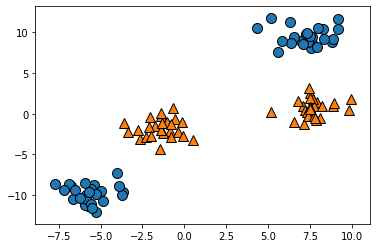

In [102]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)

[<matplotlib.lines.Line2D at 0xf5c550>, <matplotlib.lines.Line2D at 0xf5c700>]

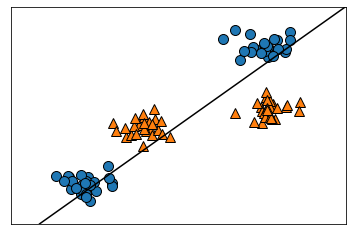

In [104]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

두 번째 특성을 제곱한 특성1 ** 2를 새로운 특성으로 추가해 입력 특성을 확장하겠다.

이제 (특성0, 특성1) 2차원 데이터 포인트가 아니라 (특성0, 특성1, 특성1 ** 2)의 3차원 데이터 포인트로 표현된다.

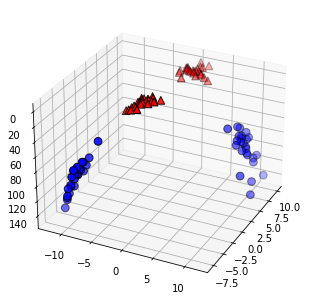

In [109]:
X_new = np.hstack([X, X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')


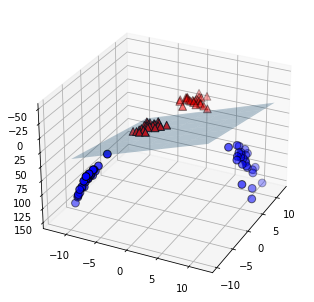

In [111]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')


[<matplotlib.lines.Line2D at 0xd27e38>, <matplotlib.lines.Line2D at 0xd27508>]

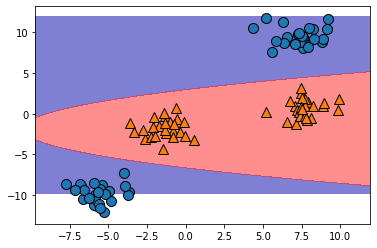

In [113]:
# 원래 두 개 특성에 투영한 결정경계
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### 커널 기법
앞에서는 데이터셋에 비선형 특성을 추가해 선형 모델을 강력하게 만들었다. 하지만 많은 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커진다. 

수학적 기교를 사용하면 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있다. 이를 커널 기법kernel trick 이라고 하며 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)를 계산한다.

SVM 에서 데이터를 고차원 공간에 매핑하는 데 많이 사용하는 방법은 두 가지이다. 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산하는 다항식 커널이 있고 가우시안 커널로도 불리는 RBF(radial basis function) 커널이 있다. 

가우시안 커널은 차원이 무한한 특성 공간에 매핑하는 것으로, 설명하기 좀 더 어렵다. 가우시안 커널은 모든 차수의 모든 다항식을 고려한다고 이해하면 좋다. 하지만 특성의 중요도는 고차항이 될수록 줄어든다.

### SVM 이해하기
학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 된다. 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 준다. 바로 두 클래스 사이의 경계에 위치한 데이터 포인트들이다. 이런 데이터 포인트를 서포트 벡터support vector 라 하며, SVM의 이름도 여기서 유래했다.

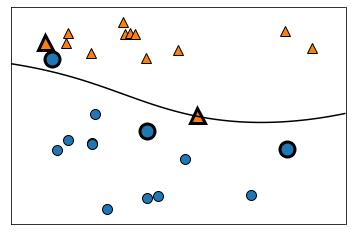

In [115]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:,1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

### SVM 매개변수 튜닝
여기서 SVM은 비선형 경계를 만들었다. 여기서 사용한 매개변수 C, gamma 에 대해 살펴본다.

gamma는 가우시안 커널 폭의 역수에 해당한다. gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다. 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적이다. 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커진다.

C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수다. 이 매개변수는 각 포인트의 중요도(dual_coef_값)를 제한한다.

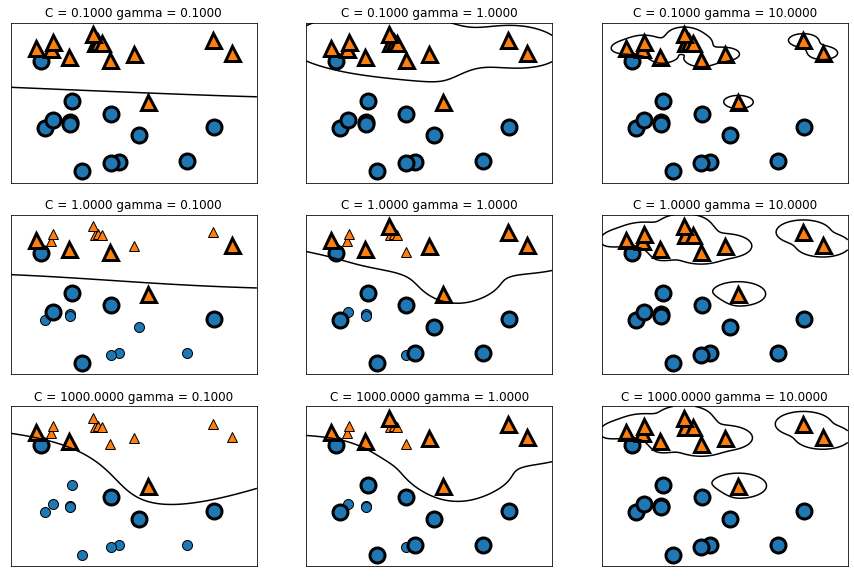

In [117]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

작은 gamma 값은 가우시안 커널의 반경을 크게 하여 많은 포인트들이 가가이 있는 것으로 고려된다. 그래서 왼쪽 그림의 결정 경계는 매우 부드럽고 오른쪽으로 갈수록 경정 경계는 하나의 포인트에 더 민감해진다. 작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춘다. 반면 큰 gamma는 더 복잡한 모델을 만든다.

선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작다. 왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않는다. 왼쪽 아래에서 볼 수 있듯 C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 한다.